#Individual Assignement I
Juliette Jannedothee
https://github.com/Jjanne/ML-fundamentals-2025.git


In [2]:
import pandas as pd

#loading excel file titanic3 into dataframe and reading it 
df = pd.read_excel("titanic3.xlsx", engine="xlrd") 
df.head

<bound method NDFrame.head of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embark

In [8]:
#DataFrame Structure
#Returns a tuple representing the dimensions of the DataFrame   
print(f"{df.shape}") 
#Summary of dataset
df.info()  

(1309, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
#Missing Values 
df.isnull().sum()  

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
#Summary of statistics in DataFrame
df.describe()  


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
#Returns number of unique values 
df.nunique()  
#Counts the number of unique values in the sex column.  
df["sex"].value_counts()  
#Counts the number of unique values in the embarked column. 
df["embarked"].value_counts() 


embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


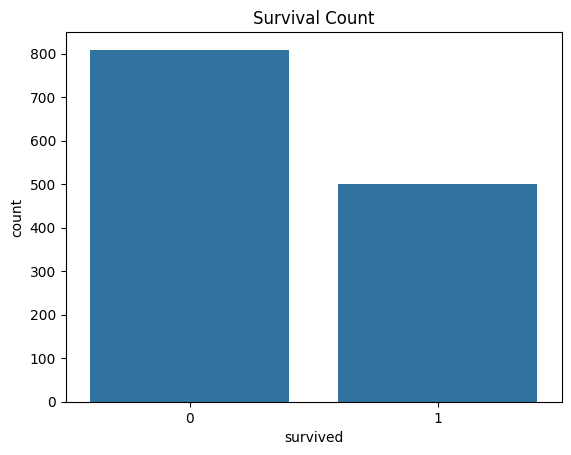

In [7]:
#Graph 
import seaborn as sns
import matplotlib.pyplot as plt

#Calculates the count plot 
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.show()

In [9]:
#Checking for missing values, showing only the columns where there are some. 
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
#Dropping columns with too many missing values 
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace=True, errors="ignore")


In [14]:
#Replaces all the missing values with the median in the numerical columns. 
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

/var/folders/3y/71c9dxjj1b11tbzsqs8wkmrc0000gn/T/ipykernel_4193/3995552844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/var/folders/3y/71c9dxjj1b11tbzsqs8wkmrc0000gn/T/ipykernel_4193/3995552844.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [15]:
#Replaces all the missing values with the mode in the categorical columns. 
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

/var/folders/3y/71c9dxjj1b11tbzsqs8wkmrc0000gn/T/ipykernel_4193/3174072216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)


In [16]:
#Creating a dataframe with only binary values, 0 meaning it is false and there are no missing values. 
df.isnull().sum()


pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [17]:
#Converting the sex to binary numbers
df["sex"] = df["sex"].map({"female": 0, "male": 1})

In [18]:
#One-hot encoding, converting it into separate columns (e.g., "S", "C", "Q") with binary numbers. 
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

In [19]:
#Displaying the first 5 rows of the dataframe
print(df.head())  
#Printing the datatypes of each column to make sure they are numerical 
print(df.dtypes)  



   pclass  survived                                             name  sex  \
0       1         1                    Allen, Miss. Elisabeth Walton    0   
1       1         1                   Allison, Master. Hudson Trevor    1   
2       1         0                     Allison, Miss. Helen Loraine    0   
3       1         0             Allison, Mr. Hudson Joshua Creighton    1   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0   

       age  sibsp  parch  ticket      fare  embarked_Q  embarked_S  
0  29.0000      0      0   24160  211.3375       False        True  
1   0.9167      1      2  113781  151.5500       False        True  
2   2.0000      1      2  113781  151.5500       False        True  
3  30.0000      1      2  113781  151.5500       False        True  
4  25.0000      1      2  113781  151.5500       False        True  
pclass          int64
survived        int64
name           object
sex             int64
age           float64
sibsp        

In [20]:
#Drops non-numeric and irrelevant columns
df.drop(columns=["name", "ticket"], inplace=True)
df[["embarked_Q", "embarked_S"]] = df[["embarked_Q", "embarked_S"]].astype(int)

In [21]:
#Gets datatypes of each column to make sure everything is numeric
print(df.dtypes)

pclass          int64
survived        int64
sex             int64
age           float64
sibsp           int64
parch           int64
fare          float64
embarked_Q      int64
embarked_S      int64
dtype: object


In [22]:
from sklearn.model_selection import train_test_split

#creating a dataframe without the column survived, assigning the variable to the y-axis
X = df.drop(columns=["survived"])
y = df["survived"]

#splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#prints the size of the train and test dataset to confirm 
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1047, 8)
Testing set size: (262, 8)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Trains the model using the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Uses the trained model to make predictions of the test set
y_pred = model.predict(X_test)

# Evaluates the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7748091603053435


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

#prints the confusion matrix so we can evaluate how the model predicted the survival vs non-survival rates. 
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Generating a classification report that includes precision, sensitivity, F-1-score, support 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[127  17]
 [ 42  76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.82      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262

